# Question 1

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [47]:
#Importing the data from salary dataset
salary = pd.read_csv("Salary_Data.csv")
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Splitting the data in train_test partitions 
X = salary.iloc[:, :-1].values
Y = salary.iloc[:, 1].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.33,random_state = 0)

In [50]:
# Training and Predicting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)
Y_Pred = regressor.predict(X_Test)

In [51]:
# Calculating the mean_squared error
from sklearn.metrics import mean_squared_error 
mean_squared_error(Y_Test,Y_Pred)


21026037.329511296

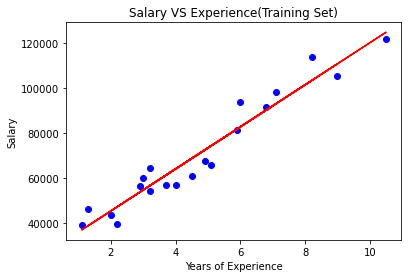

In [52]:
# Visualizing train data using scatter plot.
plt.scatter(X_Train,Y_Train,color='blue')
plt.plot(X_Train,regressor.predict(X_Train),color='red')
plt.title('Salary VS Experience(Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

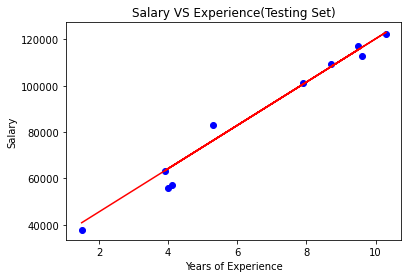

In [53]:
# Visualizing test data using scatter plot.
plt.scatter(X_Test,Y_Test,color='blue')
plt.plot(X_Test,regressor.predict(X_Test),color='red')
plt.title('Salary VS Experience(Testing Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Question 2

In [32]:
#Importing data from dataset
cluster_data=pd.read_csv("K-Mean_Dataset.csv")
cluster_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [33]:
from sklearn.model_selection import train_test_split
X = cluster_data.iloc[:, :-1].values
Y = cluster_data.iloc[:, -1].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.33,random_state = 0)

In [34]:
cluster_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [35]:
# Removing null values by Mean
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cluster_data['CUST_ID'] = le.fit_transform(cluster_data.CUST_ID.values)
X_new=cluster_data.fillna(cluster_data.mean())

In [36]:
cluster_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [37]:
# Using elbow method to find good number of clusters with the K-Means algorithm
from sklearn.cluster import KMeans
Inertia = []
for i in range(1,11):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(X_new)
 Inertia.append(kmeans.inertia_)


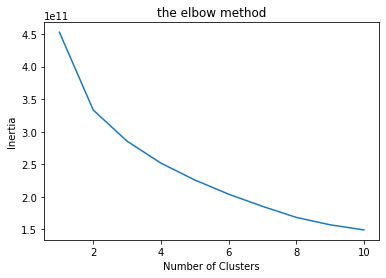

In [38]:
plt.plot(range(1,11),Inertia)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [39]:
from sklearn.cluster import KMeans
nclusters = 2 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_new)

KMeans(n_clusters=2)

In [41]:
# Calculating the silhouette score
y_cluster_kmeans = km.predict(X_new)
from sklearn import metrics
score = metrics.silhouette_score(X_new, y_cluster_kmeans)
print(score)

0.4272072267584384


# Question 3

In [42]:
# feature scaling and then applying K-Means on the scaled features
scaler = preprocessing.StandardScaler()
scaler.fit(X_new)
X_scaled_array = scaler.transform(X_new)
X_scaled = pd.DataFrame(X_scaled_array, columns = X_new.columns)

In [43]:
from sklearn.cluster import KMeans
Inertia = []
for i in range(1,11):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(X_scaled)
 Inertia.append(kmeans.inertia_)


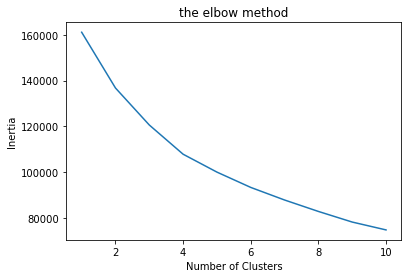

In [44]:
plt.plot(range(1,11),Inertia)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
nclusters = 2# This is k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)

KMeans(n_clusters=2)

In [46]:
# Calculating the silhouette score
y_cluster_kmeans = km.predict(X_scaled)
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print(score)

0.1919748976345269
